# Árvore de decisão


In [35]:
import pandas as pd
from datetime import datetime

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


Vamos fazer o tratamento de dados da tabela pra que fiquem somente os dados com que vamos trabalahar

In [36]:
a_trocar = {
    'no': 0,
    'yes': 1
}
dados.sold = dados.sold.map(a_trocar)


current_year = datetime.today().year
dados['age'] = current_year - dados.model_year
dados ['km_per_year'] = dados.mileage_per_year * 1.60934

dados = dados.drop(columns=['Unnamed: 0', 'mileage_per_year', 'model_year'])

dados.head()


,price,sold,age,km_per_year
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


Vamos treinar o nosso modelo

In [37]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np

import matplotlib.pyplot as plt

SEED = 5
np.random.seed(SEED)

x = dados[['price', 'age', 'km_per_year']]
y = dados['sold']


def treinar(tipoModelo = LinearSVC()):
    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify=y)
    print("Vamos treinar %d elemntos e testaremos %d elementos" % (len(treino_x), len(teste_x)))

    modelo = tipoModelo
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)
    acuracia = accuracy_score(teste_y, previsoes) * 100
    print("A acurácia foi de %.2f%%" % acuracia)


treinar()

Vamos treinar 7500 elemntos e testaremos 2500 elementos
A acurácia foi de 58.00%


c:\users\vitor.henrique\documents\projetos\python\machine-learning-python\introducao-classificacao-sklearn\.venv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Vamos colocar um base do `SKLearn` o `DummmyClassifier`. O [dummy Classifier](https://scikit-learn
.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) tem como estratégia padrão o *stratified*.
Porntanto usaremos ela primeiro, e depois a *most_frequent* para analisarmos a diferença.

In [38]:
from sklearn.dummy import DummyClassifier

print('Stratified:')
dummy_stratified = DummyClassifier()
treinar(tipoModelo=dummy_stratified)

print('\nMost frequent:')
most_frequent = DummyClassifier(strategy="most_frequent")
treinar(tipoModelo=most_frequent)

Stratified:
Vamos treinar 7500 elemntos e testaremos 2500 elementos
A acurácia foi de 51.24%

Most frequent:
Vamos treinar 7500 elemntos e testaremos 2500 elementos
A acurácia foi de 58.00%


c:\users\vitor.henrique\documents\projetos\python\machine-learning-python\introducao-classificacao-sklearn\.venv\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


Vamos pegar os dados e utilizar o `StandearScaler`, eé irá deslocar os dados e divide pelo desvio padrão, criando um
espaço menor entre os dados e mais denso (onde ocorre as maiores alterações)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def treinar_com_scaler(modelo_treino = SVC()):
    raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
    print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))
    scaler = StandardScaler()
    scaler.fit(raw_treino_x)

    treino_x = scaler.transform(raw_treino_x)
    teste_x = scaler.transform(raw_teste_x)

    modelo = modelo_treino
    modelo.fit(treino_x, treino_y)
    previsoes = modelo.predict(teste_x)
    acuracia = accuracy_score(teste_y, previsoes) * 100
    print("A acurácia foi %.2f%%" % acuracia)

treinar_com_scaler()

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 75.96%


Observamos que com a escala o algoritmo tem um performance melhor. Mas acabamos não entendendo o porquê. Isso ocorre
porque os algoritmos de `SVC` são do tipo blackbox (não sabemos sua tomada de decisão).

## Árvore de decisão

Por isso, agora vamos observar e entender o

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 75.48%


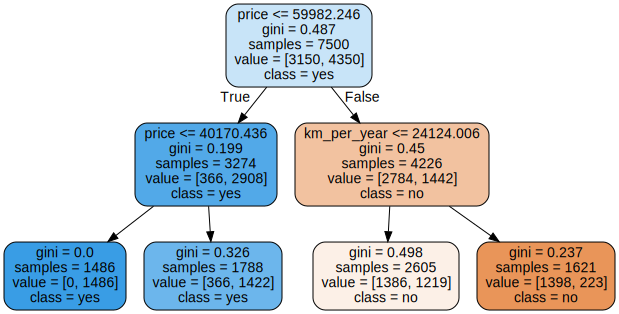

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# def treinar_arvore_decisao(classifier = DecisionTreeClassifier()):
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                 stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(raw_treino_x), len(raw_teste_x)))


modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled=True, rounded=True,
                           feature_names=features,
                           class_names=["no","yes"])

grafico = graphviz.Source(dot_data)
grafico

# treinar_arvore_decisao()
